## Problem 2
## Part a 

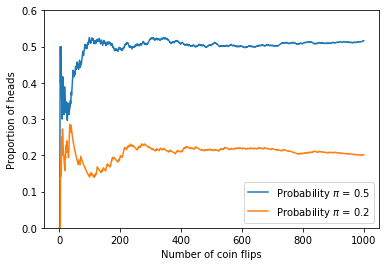

In [7]:
%matplotlib inline
import nbconvert
import numpy as np
import random as rd
import matplotlib.pyplot as plt 
rd.seed(2008)
def FlipCoin(pi, n):
    Ratio = []
    Count = []
    ConsecCount = []
    heads = 0
    count = 0
    
    for i in range(0,n):
        count += 1
        a = rd.random()
        if a < pi:
            heads += 1
            CountFlag = 1 
        else:
            CountFlag = -1
        Ratio.append (heads/count) 
        Count.append(count) 
        
        if i == 0:
            CountFlagPre = CountFlag
            conseccount = 1
        else:
            if CountFlag == CountFlagPre:
                conseccount += 1
            else:
                ConsecCount.append(conseccount)
                conseccount = 1
                CountFlagPre = CountFlag
                   
    ConsecCount.append(conseccount)
    return Ratio, Count, ConsecCount
        
Ratio, Count, ConsecCount = FlipCoin(0.5, 1000)
Ratio1, Count1, ConsecCount1 = FlipCoin(0.2, 1000)
plt.plot(Count, Ratio, label = r'Probability $\pi$ = 0.5')    
plt.plot(Count1, Ratio1, label = r'Probability $\pi$ = 0.2')  
plt.xlabel('Number of coin flips')
plt.ylabel('Proportion of heads')
plt.ylim(0,0.6)
plt.legend()
plt.show()

## Part b
The histogram of run length decays very rapdily with respect to run length. 1 is the most frequenctly one. Most of the run length are =< 5 times. There is run numbers more than 10, but the proportion is very small. That is because the possibility that repeatedly get more than 10 same results is less than (1/2)$^{10}$ = 0.0009765625

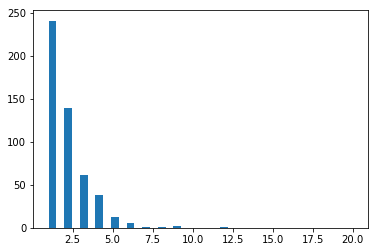

In [2]:
bins = np.linspace(1,20,40)
plt.hist(ConsecCount, bins)
plt.show()

## Problem 3
### Transformation Method

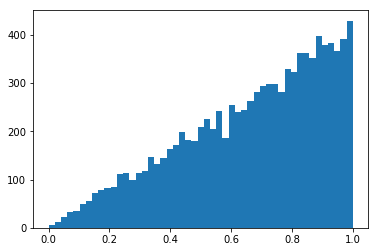

In [3]:
x = []
bins = np.linspace(0,1,50)
for i in range(0,10000):
    x.append(np.sqrt(rd.random()))
plt.hist(x,bins)
plt.show()

### Acceptance-rejection method

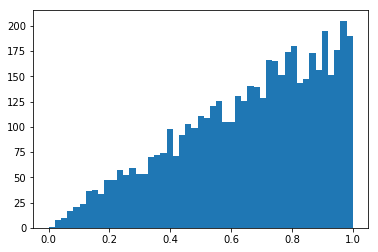

In [4]:
AcceptX = []
for i in range(0,10000):
    x = rd.random()
    y = 2*rd.random()
    if 2*x > y:
        AcceptX.append(x)
plt.hist(AcceptX, bins = np.linspace(0,1,50))
plt.show()

## Problem 4
### part 1 P = 0.891231809817949

In [5]:
import math
A = math.factorial(365)/math.factorial(325)
print(1- A/(365**40))

0.891231809817949


### part 2 p = 0.9667

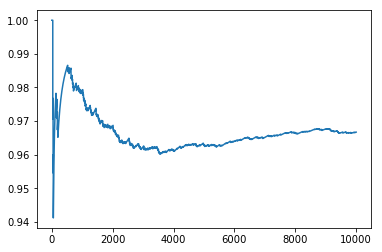

0.9667


In [6]:
def ART():
    AcceptX = []
    for i in range(0,4000):
        x = rd.randint(1, 365)
        y = rd.random()+0.5
        if 1+0.5*np.sin(2*np.pi/365*x) > y:
            AcceptX.append(x)
        if len(AcceptX) >= 40:
            break
    return AcceptX

ShareB = 0
n = 10000
trial = np.linspace(1,n,n)
p = []
for j in range(0,n):
    AcceptX = ART()
    if len(AcceptX) > len(np.unique(AcceptX)):
        ShareB += 1
    p.append(ShareB/trial[j])

plt.plot(trial, p)
plt.show()
print(p[-1])